# Importing Libraries

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part1: Datat Analysis

In [4]:
# Importing Files
data_matches = pd.read_csv('../raw_data/data/FIFA World Cup/WorldCupMatches.csv')
data_players = pd.read_csv('../raw_data/data/FIFA World Cup/WorldCupPlayers.csv')
data_cups = pd.read_csv('../raw_data/data/FIFA World Cup/WorldCups.csv')
# Adding international Matches for Qatar first participation in the World Cup 2022 as Host country
international_matches = pd.read_csv('../raw_data/data/International football results from 1872 to 2022/results.csv')

# EDA

In [5]:
# EDA
print(data_matches.describe())
print(data_players.describe())
print(data_cups.describe())
print(international_matches.describe())

              Year  Home Team Goals  Away Team Goals     Attendance  \
count   852.000000       852.000000       852.000000     850.000000   
mean   1985.089202         1.811033         1.022300   45164.800000   
std      22.448825         1.610255         1.087573   23485.249247   
min    1930.000000         0.000000         0.000000    2000.000000   
25%    1970.000000         1.000000         0.000000   30000.000000   
50%    1990.000000         2.000000         1.000000   41579.500000   
75%    2002.000000         3.000000         2.000000   61374.500000   
max    2014.000000        10.000000         7.000000  173850.000000   

       Half-time Home Goals  Half-time Away Goals       RoundID       MatchID  
count            852.000000            852.000000  8.520000e+02  8.520000e+02  
mean               0.708920              0.428404  1.066177e+07  6.134687e+07  
std                0.937414              0.691252  2.729613e+07  1.110572e+08  
min                0.000000             

# Observing total number of rows and columns in the dataset

In [6]:
# Observing total number of rows and columns in the dataset
print(data_matches.head())
print(data_matches.tail())
print(data_matches.shape)   #(4572, 20)

print(data_players.head())
print(data_players.tail())
print(data_players.shape)   #(37784, 9)

print(data_cups.head())
print(data_cups.tail())
print(data_cups.shape)     #(20, 10)

print(international_matches.head())
print(international_matches.tail())
print(international_matches.shape)     #(44060, 9)

     Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   
3        Romania              3.0              1.0           Peru   
4      Argentina              1.0              0.0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                   3.0                   0

# Observing all the columns in the dataset

In [7]:
# Observing all the columns in the dataset
print(list(data_matches))
print(list(data_players))
print(list(data_cups))
print(list(international_matches))

['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name', 'Home Team Goals', 'Away Team Goals', 'Away Team Name', 'Win conditions', 'Attendance', 'Half-time Home Goals', 'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2', 'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials']
['RoundID', 'MatchID', 'Team Initials', 'Coach Name', 'Line-up', 'Shirt Number', 'Player Name', 'Position', 'Event']
['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth', 'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance']
['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'city', 'country', 'neutral']


# Finding Missing Values

In [8]:
# Finding Missing Values
print(data_matches.isnull().sum())
print(data_players.isnull().sum())
print(data_cups.isnull().sum())
print(international_matches.isnull().sum())

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64
RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64
Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attenda

# Handling missing data

In [9]:
# Cleaning data_players
x1 = np.array(data_players['Event'].isna())
x2 = (data_players['Position'].isna())   #True = 0

for i in range(len(x1)):
    if x1[i] == False:
        x2[i] = x2.replace(True, False).all()

x2_value = x2.astype(int)
x2_value = x2_value.replace([0,1], ['C','GK'])
# Replaciing Position column with x2_value in the dataset
data_players = data_players.drop('Position', axis = 1)
data_players_new = pd.concat([data_players, x2_value], axis = 1)

In [10]:
print(data_players_new.isnull().sum())

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Event            28715
Position             0
dtype: int64


In [11]:
# Cleaning data_matches
data_matches_new = data_matches.loc[0:851,:]
data_matches_new['Attendance'] = data_matches_new['Attendance'].fillna(data_matches_new['Attendance'].value_counts().idxmax())

/tmp/ipykernel_24373/2935382736.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_matches_new['Attendance'] = data_matches_new['Attendance'].fillna(data_matches_new['Attendance'].value_counts().idxmax())


In [12]:
print(data_matches_new.isnull().sum())

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              0
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64


In [13]:
# Cleaning data_cups
data_cups['Attendance'] = data_cups['Attendance'].str.replace('.', '')

/tmp/ipykernel_24373/4127606445.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_cups['Attendance'] = data_cups['Attendance'].str.replace('.', '')


In [14]:
print(data_cups.isnull().sum())

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64


# Visualisation
# Analysis of Worldcup

In [15]:
# Year vs Attendance
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
attendance = data_cups.groupby('Year')['Attendance'].sum().reset_index()
attendance['Year'] = attendance['Year'].astype(int)
attendance['Attendance'] = attendance['Attendance'].astype(int)
sns.barplot(attendance['Year'], attendance['Attendance'],  linewidth = 2,  palette = "muted")
plt.grid(True)
plt.title("Attendence by Years", color='r', fontsize = 20, loc = 'center' )
plt.savefig('/home/nxn59/STAT_Data_Mining/fifa-world-cup/Year_Attendance')


TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 1000x1000 with 0 Axes>

In [16]:
# Year vs Qualified teams
plt.figure(figsize = (10,10))
quali = data_cups.groupby('Year')['QualifiedTeams'].sum().reset_index()
quali['Year'] = quali['Year'].astype(int)
quali['QualifiedTeams'] = quali['QualifiedTeams'].astype(int)
sns.barplot(quali['Year'], quali['QualifiedTeams'],  linewidth = 2,  palette = "Blues_d")
plt.title("Qualified Teams by Year", color='b', fontsize = 20, loc = 'center' )
plt.savefig('/home/nxn59/STAT_Data_Mining/fifa-world-cup/Year_Qualified_Teams')

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 1000x1000 with 0 Axes>

In [17]:
# Year vs MatchesPlayed
plt.figure(figsize = (10,10))
m_p = data_cups.groupby('Year')['MatchesPlayed'].sum().reset_index()
m_p['Year'] = quali['Year'].astype(int)
m_p['MatchesPlayed'] = m_p['MatchesPlayed'].astype(int)
sns.barplot(m_p['Year'], m_p['MatchesPlayed'],  linewidth = 2,  palette = "Blues_d")
plt.title("Matches Played by Teams over the Years", color='b', fontsize = 20, loc = 'center' )
plt.savefig('/home/nxn59/STAT_Data_Mining/fifa-world-cup/Year_Matches_Played_Teams')

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 1000x1000 with 0 Axes>

In [18]:
# Goals scored in worldcup
plt.figure(figsize = (10,10))
g_s = data_cups.groupby('Year')['GoalsScored'].sum().reset_index()
g_s['Year'] = g_s['Year'].astype(int)
g_s['GoalsScored'] = g_s['GoalsScored'].astype(int)
sns.barplot(g_s['Year'], g_s['GoalsScored'],  linewidth = 2,  palette = 'muted')
plt.title("Goals Scored over the Years", color='b', fontsize = 20, loc = 'center' )
plt.savefig('/home/nxn59/STAT_Data_Mining/fifa-world-cup/Year_Goals_Scored')

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 1000x1000 with 0 Axes>

                Winner  Runners-Up  Third  Fourth
Brazil             5.0         2.0    2.0     2.0
Italy              4.0         2.0    1.0     1.0
Germany FR         3.0         3.0    1.0     1.0
Argentina          2.0         3.0    0.0     0.0
Uruguay            2.0         0.0    0.0     3.0
Germany            1.0         1.0    3.0     0.0
France             1.0         1.0    2.0     1.0
England            1.0         0.0    0.0     1.0
Spain              1.0         0.0    0.0     1.0
Netherlands        0.0         3.0    1.0     1.0
Czechoslovakia     0.0         2.0    0.0     0.0
Hungary            0.0         2.0    0.0     0.0
Sweden             0.0         1.0    2.0     1.0
Poland             0.0         0.0    2.0     0.0
Austria            0.0         0.0    1.0     1.0
Portugal           0.0         0.0    1.0     1.0
USA                0.0         0.0    1.0     0.0
Chile              0.0         0.0    1.0     0.0
Croatia            0.0         0.0    1.0     0.0


FileNotFoundError: [Errno 2] No such file or directory: '/home/nxn59/STAT_Data_Mining/fifa-world-cup/Wining_Teams.png'

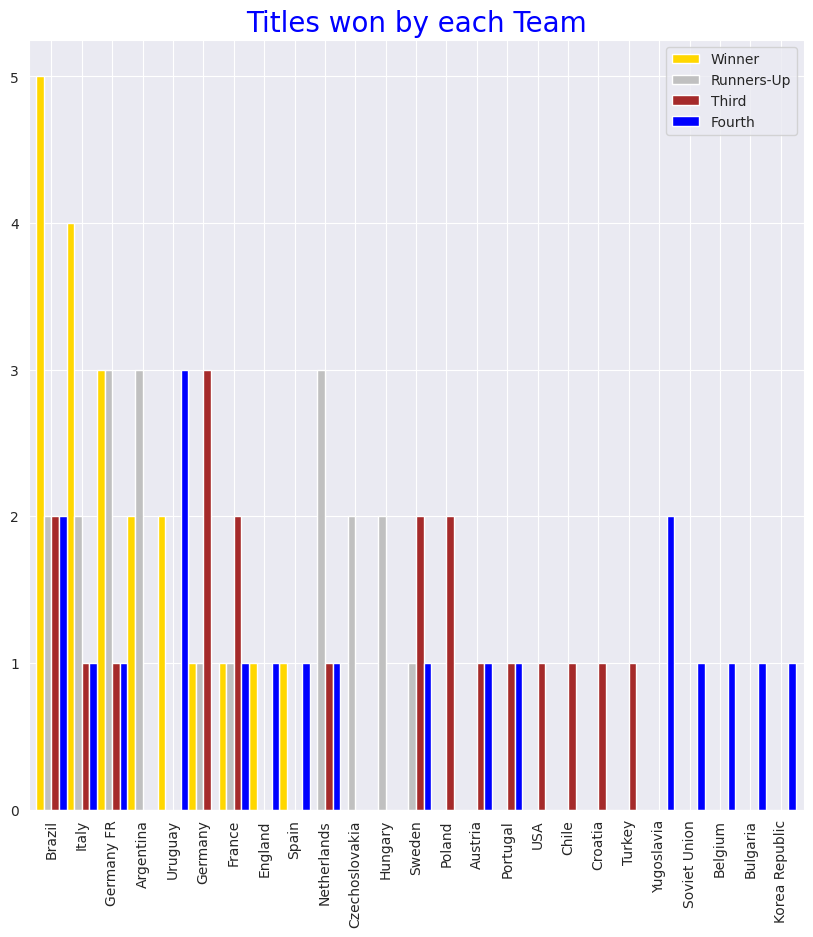

In [19]:
# Wining Teams
w = data_cups['Winner'].value_counts()
r_u = data_cups['Runners-Up'].value_counts()
t_p = data_cups['Third'].value_counts()
f_p = data_cups['Fourth'].value_counts()
full_time = pd.concat([w, r_u, t_p, f_p], axis = 1, sort = False)
full_time = full_time.sort_values(['Winner', 'Runners-Up', 'Third', 'Fourth'], ascending = False).fillna(0)
print(full_time)
print(full_time.sum(axis = 1))
full_time.plot(y=['Winner', 'Runners-Up', 'Third','Fourth'], kind="bar", color =['gold','silver','brown','blue'], figsize=(10, 10), width=1)
plt.title("Titles won by each Team", color='b', fontsize = 20, loc = 'center' )
plt.savefig('/home/nxn59/STAT_Data_Mining/fifa-world-cup/Wining_Teams')

# Analysis of Worldcup Matches
# Slearn Libraries

In [20]:
# Analysis of Worldcup Matches
# Slearn Libraries
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

In [21]:
def replace_country_name(df):
    if(df['Home Team Name'] in ['German DR', 'Germany FR']):
        df['Home Team Name'] = 'Germany'
    elif(df['Home Team Name'] == 'Soviet Union'):
        df['Home Team Name'] = 'Russia'
    elif(df['Home Team Name'] == 'Korea Republic'):
        df['Home Team Name'] = 'Korea Republic'
    elif(df['Home Team Name'] == 'Korea DPR'):
        df['Home Team Name'] = 'Korea Republic'
    elif(df['Home Team Name'] == 'rn">Republic of Ireland'):
        df['Home Team Name'] = 'Ireland'
    elif(df['Home Team Name'] == 'China PR'):
        df['Home Team Name'] = 'China'
    elif(df['Home Team Name'] == 'rn">Trinidad and Tobago'):
        df['Home Team Name'] = 'Trinidad and Tobago'
    elif(df['Home Team Name'] == 'rn">Serbia and Montenegro'):
        df['Home Team Name'] = 'Serbia and Montenegro'
    elif(df['Home Team Name'] == "C�te d'Ivoire"):
        df['Home Team Name'] = "Cote d'Ivoire"
    elif(df['Home Team Name'] == 'IR Iran'):
        df['Home Team Name'] = 'Iran'
    elif(df['Home Team Name'] == 'rn">Bosnia and Herzegovina'):
        df['Home Team Name'] = 'Bosnia and Herzegovina'
    elif(df['Home Team Name'] == 'Dutch East Indies'):
        df['Home Team Name'] = 'Dutch'
    elif(df['Home Team Name'] == 'Northern Ireland'):
        df['Home Team Name'] = 'Ireland'
    elif(df['Home Team Name'] == 'rn">United Arab Emirates'):
        df['Home Team Name'] = 'United Arab Emirates'
        
    if(df['Away Team Name'] in ['German DR', 'Germany FR']):
        df['Away Team Name'] = 'Germany'
    elif(df['Away Team Name'] == 'Soviet Union'):
        df['Away Team Name'] = 'Russia'
    elif(df['Away Team Name'] == 'Korea Republic'):
        df['Away Team Name'] = 'Korea Republic'
    elif(df['Away Team Name'] == 'Korea DPR'):
        df['Away Team Name'] = 'Korea Republic'
    elif(df['Away Team Name'] == 'rn">Republic of Ireland'):
        df['Away Team Name'] = 'Ireland'
    elif(df['Away Team Name'] == 'China PR'):
        df['Away Team Name'] = 'China'
    elif(df['Away Team Name'] == 'rn">Trinidad and Tobago'):
        df['Away Team Name'] = 'Trinidad and Tobago'
    elif(df['Away Team Name'] == 'rn">Serbia and Montenegro'):
        df['Away Team Name'] = 'Serbia and Montenegro'
    elif(df['Away Team Name'] == "C�te d'Ivoire"):
        df['Away Team Name'] = "Cote d'Ivoire"
    elif(df['Away Team Name'] == 'IR Iran'):
        df['Away Team Name'] = 'Iran'
    elif(df['Away Team Name'] == 'rn">Bosnia and Herzegovina'):
        df['Away Team Name'] = 'Bosnia and Herzegovina'
    elif(df['Away Team Name'] == 'Dutch East Indies'):
        df['Away Team Name'] = 'Dutch'
    elif(df['Away Team Name'] == 'Northern Ireland'):
        df['Away Team Name'] = 'Ireland'
    elif(df['Away Team Name'] == 'rn">United Arab Emirates'):
        df['Away Team Name'] = 'United Arab Emirates'
    return df

In [22]:
data_matches_new = data_matches_new.apply(replace_country_name, axis = 1)

# Creating a list of all teams playing football worlcup:

In [23]:
# Creating a list of all teams playing football worlcup:
team_name = {}
index = 0
for idx, row in data_matches_new.iterrows():
    name = row['Home Team Name']
    if (name not in team_name.keys()):
        team_name[name] = index
        index += 1
        
    name = row['Away Team Name']
    if (name not in team_name.keys()):
        team_name[name] = index
        index += 1

In [24]:
team_name['Qatar']= 77

In [25]:
list(team_name.keys())[-1]

'Qatar'

# Drop unwanted data from data_new_matches

In [26]:
# Drop unwanted data from data_new_matches
data_matches_to_use = data_matches_new.drop(['Datetime', 'Stage', 'Stadium', 'City', 'Win conditions', 
                                             'Attendance', 'Half-time Home Goals', 'Half-time Away Goals', 
                                             'Referee', 'Assistant 1', 'Assistant 2',
                                             'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'], 1)

/tmp/ipykernel_24373/788174380.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_matches_to_use = data_matches_new.drop(['Datetime', 'Stage', 'Stadium', 'City', 'Win conditions',


In [27]:
data_matches_to_use.head()

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name
0,1930.0,France,4.0,1.0,Mexico
1,1930.0,USA,3.0,0.0,Belgium
2,1930.0,Yugoslavia,2.0,1.0,Brazil
3,1930.0,Romania,3.0,1.0,Peru
4,1930.0,Argentina,1.0,0.0,France


# Merging Qatar international matches to the world cup matches dataset

## Selecting only Qatar from international matches and clearning the data

In [28]:
team_name_df = pd.DataFrame.from_dict(team_name,orient='index')
team_name_df.reset_index
A_list=  team_name_df.index
international_quatar= international_matches[(international_matches['home_team'].isin(['Qatar']) & international_matches['away_team'].isin(A_list)) |(international_matches['home_team'].isin(A_list) & international_matches['away_team'].isin(['Qatar']))]
international_quatar = international_quatar [['date','home_team','home_score','away_score','away_team','tournament','city','country','neutral']]
international_quatar.drop(columns=['tournament','city','country','neutral'],inplace=True)
international_quatar['date']=(((international_quatar['date'])).str[:4]).astype(float)

In [29]:
international_quatar.rename(columns = {'date':'Year','home_team':'Home Team Name','home_score':'Home Team Goals','away_score':'Away Team Goals','away_team':'Away Team Name'},inplace=True)
international_quatar.head()

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name
7514,1970.0,Kuwait,4.0,2.0,Qatar
7516,1970.0,Saudi Arabia,1.0,1.0,Qatar
8185,1972.0,Algeria,3.0,0.0,Qatar
8242,1972.0,Qatar,0.0,1.0,United Arab Emirates
8247,1972.0,Saudi Arabia,4.0,0.0,Qatar


## Merging the data

In [30]:
data_matches_to_use[(data_matches_to_use['Home Team Name']=='Qatar') | (data_matches_to_use['Away Team Name']=='Qatar')]

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name


In [31]:
df1=data_matches_to_use.append(international_quatar,ignore_index = True)


/tmp/ipykernel_24373/1005165021.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=data_matches_to_use.append(international_quatar,ignore_index = True)


In [32]:
df1.describe()

,Year,Home Team Goals,Away Team Goals
count,1095.000000,1095.000000,1095.000000
mean,1988.374429,1.723288,1.041096
std,21.820870,1.585802,1.090574
min,1930.000000,0.000000,0.000000
25%,1974.000000,1.000000,0.000000
50%,1994.000000,1.000000,1.000000
75%,2006.000000,2.000000,2.000000
max,2022.000000,10.000000,7.000000


In [33]:
df1[df1['Away Team Name']=='Qatar']

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name
852,1970.0,Kuwait,4.0,2.0,Qatar
853,1970.0,Saudi Arabia,1.0,1.0,Qatar
854,1972.0,Algeria,3.0,0.0,Qatar
856,1972.0,Saudi Arabia,4.0,0.0,Qatar
857,1972.0,Kuwait,5.0,0.0,Qatar
...,...,...,...,...,...
1079,2020.0,Costa Rica,1.0,1.0,Qatar
1081,2021.0,Honduras,0.0,2.0,Qatar
1085,2021.0,Portugal,3.0,0.0,Qatar
1086,2021.0,Serbia,4.0,0.0,Qatar


In [34]:
data_matches_to_use = df1

# Count champions 

In [35]:
# Count champions 
winners =  data_cups['Winner'].map(lambda n: 'Germany' if n == 'Germany FR' else n).value_counts()


# Home and Away Team champions
data_matches_to_use["Home Team Champion"] = 0
data_matches_to_use["Away Team Champion"] = 0

def winners_wc(df):
    if(winners.get(df['Home Team Name']) != None):
        df['Home Team Champion'] = winners.get(df['Home Team Name'])
    if(winners.get(df['Away Team Name']) != None):
        df['Away Team Champion'] = winners.get(df['Away Team Name'])
    
    return df

data_matches_to_use = data_matches_to_use.apply(winners_wc, axis = 1)


In [36]:
winners.head()

Brazil       5
Italy        4
Germany      4
Uruguay      2
Argentina    2
Name: Winner, dtype: int64

# Winner of particular match

In [37]:
# Winner of particular match
# For Home team win value is 1, Away team win value is 2 and for Draw value is 0
data_matches_to_use['Winner'] = '-'

def match_winner(df):
    if (int(df['Home Team Goals']) == int(df['Away Team Goals'])):
        df['Winner'] = 0
    elif(int(df['Home Team Goals']) > int(df['Away Team Goals'])):
        df['Winner'] = 1
    else:
        df['Winner'] = 2
    
    return df

data_matches_to_use = data_matches_to_use.apply(match_winner, axis = 1)

In [38]:
data_matches_to_use.head()

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Home Team Champion,Away Team Champion,Winner
0,1930.0,France,4.0,1.0,Mexico,1,0,1
1,1930.0,USA,3.0,0.0,Belgium,0,0,1
2,1930.0,Yugoslavia,2.0,1.0,Brazil,0,5,1
3,1930.0,Romania,3.0,1.0,Peru,0,0,1
4,1930.0,Argentina,1.0,0.0,France,2,1,1


In [39]:
data_matches_to_use[data_matches_to_use['Away Team Name']=='Qatar']

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Home Team Champion,Away Team Champion,Winner
852,1970.0,Kuwait,4.0,2.0,Qatar,0,0,1
853,1970.0,Saudi Arabia,1.0,1.0,Qatar,0,0,0
854,1972.0,Algeria,3.0,0.0,Qatar,0,0,1
856,1972.0,Saudi Arabia,4.0,0.0,Qatar,0,0,1
857,1972.0,Kuwait,5.0,0.0,Qatar,0,0,1
...,...,...,...,...,...,...,...,...
1079,2020.0,Costa Rica,1.0,1.0,Qatar,0,0,0
1081,2021.0,Honduras,0.0,2.0,Qatar,0,0,2
1085,2021.0,Portugal,3.0,0.0,Qatar,0,0,1
1086,2021.0,Serbia,4.0,0.0,Qatar,0,0,1


# Replace Team names by corresponding id:

In [40]:
# Replace Team names by corresponding id:
def replace_name(df):
    df['Home Team Name'] = team_name[df['Home Team Name']]
    df['Away Team Name'] = team_name[df['Away Team Name']]
    
    return df

Team_id = data_matches_to_use.apply(replace_name, axis = 1)

# Now we dont need number of goals and year

In [41]:
# Now we dont need number of goals and year
Team_id = Team_id.drop(['Year','Home Team Goals', 'Away Team Goals'], 1)

/tmp/ipykernel_24373/2414074574.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Team_id = Team_id.drop(['Year','Home Team Goals', 'Away Team Goals'], 1)


# Preparing Training and Testing Data:

In [42]:
# Preparing Training and Testing Data:
X = Team_id.iloc[:, 0:4].values
y = Team_id.iloc[:, -1].values

X = np.array(X, dtype = 'f')
y = np.array(y, dtype = 'f')

from sklearn.preprocessing import LabelEncoder
LabelEncoder_res=LabelEncoder()
y=LabelEncoder_res.fit_transform(y)

X, y = shuffle(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Scalling of Data:

In [43]:
# Scalling of Data:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Building ANN

In [44]:
# Building ANN
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

2022-11-14 20:51:36.734506: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-14 20:51:38.025311: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-14 20:51:38.025396: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-14 20:51:38.195154: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-14 20:51:41.141316: W tensorflow/stream_executor/platform/de

# seed

In [45]:
#seed
np.random.seed(47)

# Logistic Regression

In [46]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
LR = LogisticRegression(random_state = 47)
parameters = {'penalty': ['l2'], 'C' : [ 0.1, 1, 10], 'multi_class' :['multinomial'], 'solver': ['lbfgs', 'newton-cg', 'saga']}
LR = GridSearchCV(LR, param_grid= parameters ,cv=5)
LR.fit(X_train, y_train)
score_train_acc = LR.score(X_train, y_train)
score_test_acc = LR.score(X_test, y_test)
print(score_train_acc) #62.42
print(score_test_acc)  #54.25
y_pred_LR = LR.predict(X_test)
print(classification_report(y_test, y_pred_LR))
print(confusion_matrix(y_test, y_pred_LR, labels=range(3)))

/home/vinesh/.pyenv/versions/3.8.12/envs/RoadToQatar2022/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/vinesh/.pyenv/versions/3.8.12/envs/RoadToQatar2022/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/home/vinesh/.pyenv/versions/3.8.12/envs/RoadToQatar2022/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/vinesh/.pyenv/versions/3.8.12/envs/RoadToQatar2022/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/home/vinesh/.pyenv/versions/3.8.12/envs/RoadToQatar2022/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: 

0.5652741514360313
0.5775075987841946
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.60      0.86      0.71       185
           2       0.48      0.42      0.44        72

    accuracy                           0.58       329
   macro avg       0.36      0.43      0.38       329
weighted avg       0.44      0.58      0.50       329

[[  0  64   8]
 [  0 160  25]
 [  0  42  30]]


/home/vinesh/.pyenv/versions/3.8.12/envs/RoadToQatar2022/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/vinesh/.pyenv/versions/3.8.12/envs/RoadToQatar2022/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/home/vinesh/.pyenv/versions/3.8.12/envs/RoadToQatar2022/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/vinesh/.pyenv/versions/3.8.12/envs/RoadToQatar2022/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/home/vinesh/.pyenv/versions/3.8.12/envs/RoadToQatar2022/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: 

# SGDClassifier

In [47]:
#SGDClassifier
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(loss = 'log', penalty = 'elasticnet')
SGD.fit(X_train, y_train)
score_train_acc = SGD.score(X_train, y_train)
score_test_acc = SGD.score(X_test, y_test)
print(score_train_acc) #62.42
print(score_test_acc)  #54.25
y_pred_SGD = SGD.predict(X_test)
print(classification_report(y_test, y_pred_SGD))
print(confusion_matrix(y_test, y_pred_SGD, labels=range(3)))

0.5744125326370757
0.5805471124620061
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.62      0.85      0.72       185
           2       0.45      0.47      0.46        72

    accuracy                           0.58       329
   macro avg       0.36      0.44      0.39       329
weighted avg       0.45      0.58      0.50       329

[[  0  59  13]
 [  0 157  28]
 [  0  38  34]]


/home/vinesh/.pyenv/versions/3.8.12/envs/RoadToQatar2022/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/home/vinesh/.pyenv/versions/3.8.12/envs/RoadToQatar2022/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vinesh/.pyenv/versions/3.8.12/envs/RoadToQatar2022/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/h

# SVM

In [48]:
# SVM
from sklearn.svm import SVC
svm_model = SVC()
#svm_model = SVC(random_state = 47, C = 0.1, kernel='sigmoid', class_weight = 'balanced', probability= True)
parameters = {'C' : [ 0.1, 0.001, 1]}#, 'multi_class' :['multinomial', 'ovr'], 'solver': ['lbfgs', 'newton-cg']}
svm_model = GridSearchCV(svm_model, param_grid= parameters ,cv=5)
svm_model.fit(X_train, y_train)
score_train_acc = svm_model.score(X_train, y_train)
score_test_acc = svm_model.score(X_test, y_test)
print(score_train_acc) #54.79
print(score_test_acc)  #51.31       
y_pred_SVM = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_SVM))
print(confusion_matrix(y_test, y_pred_SVM, labels=range(3)))

0.577023498694517
0.5866261398176292
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.62      0.86      0.72       185
           2       0.48      0.46      0.47        72

    accuracy                           0.59       329
   macro avg       0.36      0.44      0.40       329
weighted avg       0.45      0.59      0.51       329

[[  0  61  11]
 [  0 160  25]
 [  0  39  33]]


/home/vinesh/.pyenv/versions/3.8.12/envs/RoadToQatar2022/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vinesh/.pyenv/versions/3.8.12/envs/RoadToQatar2022/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vinesh/.pyenv/versions/3.8.12/envs/RoadToQatar2022/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

# Decision Tree

In [49]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)
score_train_acc = dc.score(X_train, y_train)
score_test_acc = dc.score(X_test, y_test)
print(score_train_acc) #91.78
print(score_test_acc)  #46.62
y_pred_dc = dc.predict(X_test) 
print(classification_report(y_test, y_pred_dc))
print(confusion_matrix(y_test, y_pred_dc, labels=range(3)))

0.839425587467363
0.45896656534954405
              precision    recall  f1-score   support

           0       0.25      0.29      0.27        72
           1       0.61      0.60      0.60       185
           2       0.30      0.26      0.28        72

    accuracy                           0.46       329
   macro avg       0.39      0.39      0.39       329
weighted avg       0.46      0.46      0.46       329

[[ 21  45   6]
 [ 36 111  38]
 [ 26  27  19]]


# KNN

In [50]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights = 'uniform', algorithm='auto')
knn.fit(X_train, y_train)
score_train_acc = knn.score(X_train, y_train)
score_test_acc = knn.score(X_test, y_test)
print(score_train_acc) #69.27
print(score_test_acc)  #52.78
y_pred_knn = knn.predict(X_test) 
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn, labels=range(3)))

0.6227154046997389
0.45896656534954405
              precision    recall  f1-score   support

           0       0.17      0.22      0.19        72
           1       0.61      0.63      0.62       185
           2       0.41      0.26      0.32        72

    accuracy                           0.46       329
   macro avg       0.40      0.37      0.38       329
weighted avg       0.47      0.46      0.46       329

[[ 16  48   8]
 [ 50 116  19]
 [ 28  25  19]]


# Naive Bayes

In [51]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
score_train_acc = nb.score(X_train, y_train)
score_test_acc = nb.score(X_test, y_test)
print(score_train_acc) #62.03
print(score_test_acc)  #59.23
y_pred_nb = nb.predict(X_test) 
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb, labels=range(3)))

0.5469973890339426
0.5562310030395137
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.63      0.75      0.68       185
           2       0.41      0.61      0.49        72

    accuracy                           0.56       329
   macro avg       0.35      0.45      0.39       329
weighted avg       0.44      0.56      0.49       329

[[  0  54  18]
 [  0 139  46]
 [  0  28  44]]


/home/vinesh/.pyenv/versions/3.8.12/envs/RoadToQatar2022/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vinesh/.pyenv/versions/3.8.12/envs/RoadToQatar2022/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vinesh/.pyenv/versions/3.8.12/envs/RoadToQatar2022/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

# Random Forest

In [52]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(n_estimators=100)
rc.fit(X_train, y_train)
score_train_acc = rc.score(X_train, y_train)
score_test_acc = rc.score(X_test, y_test)
print(score_train_acc) #91.58
print(score_test_acc)  #51.31
y_pred_rc = rc.predict(X_test) 
print(classification_report(y_test, y_pred_rc))
print(confusion_matrix(y_test, y_pred_rc, labels=range(3)))

0.839425587467363
0.47416413373860183
              precision    recall  f1-score   support

           0       0.20      0.15      0.17        72
           1       0.61      0.63      0.62       185
           2       0.34      0.39      0.36        72

    accuracy                           0.47       329
   macro avg       0.38      0.39      0.39       329
weighted avg       0.46      0.47      0.47       329

[[ 11  48  13]
 [ 26 117  42]
 [ 17  27  28]]


# Bagging Classifier

In [53]:
# Bagging Classifier
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=100)
bc.fit(X_train, y_train)
score_train_acc = bc.score(X_train, y_train)
score_test_acc = bc.score(X_test, y_test)
print(score_train_acc) #91.78
print(score_test_acc)  #48.09
y_pred_bc = bc.predict(X_test) 
print(classification_report(y_test, y_pred_bc))
print(confusion_matrix(y_test, y_pred_bc, labels=range(3)))

0.839425587467363
0.47112462006079026
              precision    recall  f1-score   support

           0       0.19      0.14      0.16        72
           1       0.60      0.62      0.61       185
           2       0.36      0.43      0.39        72

    accuracy                           0.47       329
   macro avg       0.38      0.40      0.39       329
weighted avg       0.46      0.47      0.46       329

[[ 10  49  13]
 [ 30 114  41]
 [ 14  27  31]]


# Gradient Boosting

In [54]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gbc.fit(X_train, y_train)
score_train_acc = gbc.score(X_train, y_train)
score_test_acc = gbc.score(X_test, y_test)
print(score_train_acc) #58.70
print(score_test_acc)  #55.13
y_pred_gbc = gbc.predict(X_test) 
print(classification_report(y_test, y_pred_gbc))
print(confusion_matrix(y_test, y_pred_gbc, labels=range(3)))

0.7075718015665796
0.5531914893617021
              precision    recall  f1-score   support

           0       0.21      0.10      0.13        72
           1       0.65      0.78      0.71       185
           2       0.43      0.43      0.43        72

    accuracy                           0.55       329
   macro avg       0.43      0.44      0.42       329
weighted avg       0.50      0.55      0.52       329

[[  7  52  13]
 [ 13 144  28]
 [ 14  27  31]]


# XGBoost

In [55]:
import xgboost as xgb

In [56]:
X_test

array([[-1.0923847 , -0.5041462 ,  2.2240791 ,  0.34989762],
       [-0.42975354, -1.3538598 ,  1.6515267 ,  0.34989762],
       [-0.01560909,  0.55799586, -0.6386831 , -0.43857032],
       ...,
       [-0.22268131, -0.03680371, -0.6386831 , -0.43857032],
       [-0.18126687,  1.3652239 , -0.06613068, -0.43857032],
       [ 0.93692315, -0.16426076, -0.6386831 , -0.43857032]],
      dtype=float32)

In [57]:
# XGBoost

XGB = xgb.XGBClassifier(base_score=0.5, 
                        booster='gbtree', 
                        colsample_bylevel=1,
                        colsample_bytree=0.8, 
                        gamma=0.4, 
                        learning_rate=0.01,
                        max_delta_step=0, 
                        max_depth=3, 
                        min_child_weight=1, 
                        #missing=null,
                        n_estimators=40, 
                        n_jobs=1, 
                        nthread=None, 
                        objective='multi:softprob',
                        random_state=0, 
                        reg_alpha=1e-05, 
                        reg_lambda=1, 
                        scale_pos_weight=1,
                        seed=2, 
                        silent=True, 
                        subsample=0.8)
#XGB = xgb.XGBClassifier(user_label_encoder=False)
XGB.fit(X_train, y_train)
score_train_acc = XGB.score(X_train, y_train)
score_test_acc = XGB.score(X_test, y_test)
print(score_train_acc) #66.53
print(score_test_acc)  #56.59      
y_pred_XGB = XGB.predict(X_test)
print(classification_report(y_test, y_pred_XGB))
print(confusion_matrix(y_test, y_pred_XGB, labels=range(3)))

[20:52:24] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight", "silent" } are not used.

0.5900783289817232
0.5896656534954408
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.62      0.87      0.72       185
           2       0.49      0.46      0.47        72

    accuracy                           0.59       329
   macro avg       0.37      0.44      0.40       329
weighted avg       0.45      0.59      0.51       329

[[  0  61  11]
 [  0 161  24]
 [  0  39  33]]


/home/vinesh/.pyenv/versions/3.8.12/envs/RoadToQatar2022/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vinesh/.pyenv/versions/3.8.12/envs/RoadToQatar2022/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vinesh/.pyenv/versions/3.8.12/envs/RoadToQatar2022/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

# Create the parameters list you wish to tune

In [58]:
parameters = { 'learning_rate' : [0.001,0.01, 0.1, 1],
               'n_estimators' : [40, 100],
               'max_depth': [3, 6],
               'min_child_weight': [1, 3],
               'gamma':[0.4],
               'subsample' : [0.5, 0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             } 

clf = xgb.XGBClassifier()

grid_obj = GridSearchCV(clf,
                        param_grid=parameters,
                        cv=5)
grid_obj = grid_obj.fit(X_train,y_train)
clf = grid_obj.best_estimator_
print(clf)


[20:52:28] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:28] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:28] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:28] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:28] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:28] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:28] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:28] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:28] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:28] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:28] WARNING: ../src/learner.cc:767: 
Parameters: { "s

[20:52:43] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:44] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:44] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:44] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:44] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:44] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:44] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:44] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:44] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:44] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:45] WARNING: ../src/learner.cc:767: 
Parameters: { "s

[20:52:57] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:58] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:58] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:58] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:58] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:58] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:58] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:58] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:58] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:58] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:52:58] WARNING: ../src/learner.cc:767: 
Parameters: { "s

[20:53:15] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:53:15] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:53:15] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:53:15] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:53:15] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:53:15] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:53:15] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:53:15] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:53:15] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:53:16] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[20:53:16] WARNING: ../src/learner.cc:767: 
Parameters: { "s

In [59]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}


clf_1 = RandomForestClassifier()

grid_obj1 = GridSearchCV(estimator = clf_1, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_obj1 = grid_obj1.fit(X_train,y_train)
clf_1 = grid_obj1.best_estimator_
print(clf_1)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   1.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   1.1s
[C

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   1.9s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   4.7s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   3.6s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   3.6s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samp

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   1.7s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   4.6s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   3.6s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   3.6s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samp

[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   5.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   1.6s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   5.6s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   5.6s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.7s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   4.8s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_

[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   3.8s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   3.8s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   3.9s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   1.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   4.8s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   1.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   3.9s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   4.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_s

[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   1.2s
[CV] END bootstrap=True, max_depth=100, max_features=3,

# Group Stage - all Kick-off

In [69]:
def prediction(team1, team2):
  id1 = team_name[team1]
  id2 = team_name[team2]
  championship1 = winners.get(team1) if winners.get(team1) != None else 0
  championship2 = winners.get(team2) if winners.get(team2) != None else 0

  t = np.array([id1, id2, championship1, championship2]).astype('float64')
  t = np.reshape(t, (1,-1))
  y_rc = LR.predict_proba(t)[0]

  text = ('Chance for '+team1+' to win against '+team2+' is {}\nChance for '+team2+' to win against '+team1+' is {}\nChance for '+team1+' and '+team2+' draw is {}').format(y_rc[1]*100,y_rc[2]*100,y_rc[0]*100)
  return y_rc, text

fixtures_wc = pd.read_csv('../raw_data/data/Fixtures/fixtures.csv')
fixtures_wc = fixtures_wc.drop(['Round Number', 'Date', 'Location', 'Result'], 1)
output_df = pd.DataFrame(columns = ['Group','Home_team','Away_team','Home_win','Away_win','Draw'])

fix = fixtures_wc.loc[0:47, :]

#Group A
for i in range(len(fix)):
     array = (fix['Group'] == 'Group A')
     index = []
     for ar in range(len(array)):
         if array[ar] == True:
             index.append(ar)
     
for indx in range(len(index)):
    corr_row = fix.loc[index[indx]]
         
    probs, text = prediction(corr_row['Home Team'], corr_row['Away Team'])
    print('Results \n', text)
    output_df=output_df.append({'Group':'Group A',
                               'Home_team':corr_row['Home Team'],
                               'Away_team':corr_row['Away Team'],
                               'Home_win':probs[1],
                               'Away_win':probs[2],
                               'Draw':probs[0]},
                               ignore_index = True)
#GROUP B    
for i in range(len(fix)):
     array = (fix['Group'] == 'Group B')
     index = []
     for ar in range(len(array)):
         if array[ar] == True:
             index.append(ar)
     
for indx in range(len(index)):
    corr_row = fix.loc[index[indx]]
         
    probs, text = prediction(corr_row['Home Team'], corr_row['Away Team'])
    print('Results \n', text) 
    output_df=output_df.append({'Group':'Group B',
                               'Home_team':corr_row['Home Team'],
                               'Away_team':corr_row['Away Team'],
                               'Home_win':probs[1],
                               'Away_win':probs[2],
                               'Draw':probs[0]},
                               ignore_index = True)
#Group C        
for i in range(len(fix)):
     array = (fix['Group'] == 'Group C')
     index = []
     for ar in range(len(array)):
         if array[ar] == True:
             index.append(ar)
     
for indx in range(len(index)):
    corr_row = fix.loc[index[indx]]
         
    probs, text = prediction(corr_row['Home Team'], corr_row['Away Team'])
    print('Results \n', text)  
    output_df=output_df.append({'Group':'Group C',
                               'Home_team':corr_row['Home Team'],
                               'Away_team':corr_row['Away Team'],
                               'Home_win':probs[1],
                               'Away_win':probs[2],
                               'Draw':probs[0]},
                               ignore_index = True)
    
#Group D        
for i in range(len(fix)):
     array = (fix['Group'] == 'Group D')
     index = []
     for ar in range(len(array)):
         if array[ar] == True:
             index.append(ar)
     
for indx in range(len(index)):
    corr_row = fix.loc[index[indx]]
         
    probs, text = prediction(corr_row['Home Team'], corr_row['Away Team'])
    print('Results \n', text)
    output_df=output_df.append({'Group':'Group D',
                               'Home_team':corr_row['Home Team'],
                               'Away_team':corr_row['Away Team'],
                               'Home_win':probs[1],
                               'Away_win':probs[2],
                               'Draw':probs[0]},
                               ignore_index = True)

#Group E        
for i in range(len(fix)):
     array = (fix['Group'] == 'Group E')
     index = []
     for ar in range(len(array)):
         if array[ar] == True:
             index.append(ar)
     
for indx in range(len(index)):
    corr_row = fix.loc[index[indx]]
         
    probs, text = prediction(corr_row['Home Team'], corr_row['Away Team'])
    print('Results \n', text)
    output_df=output_df.append({'Group':'Group E',
                               'Home_team':corr_row['Home Team'],
                               'Away_team':corr_row['Away Team'],
                               'Home_win':probs[1],
                               'Away_win':probs[2],
                               'Draw':probs[0]},
                               ignore_index = True)

#Group F        
for i in range(len(fix)):
     array = (fix['Group'] == 'Group F')
     index = []
     for ar in range(len(array)):
         if array[ar] == True:
             index.append(ar)
     
for indx in range(len(index)):
    corr_row = fix.loc[index[indx]]
         
    probs, text = prediction(corr_row['Home Team'], corr_row['Away Team'])
    print('Results \n', text)
    output_df=output_df.append({'Group':'Group F',
                               'Home_team':corr_row['Home Team'],
                               'Away_team':corr_row['Away Team'],
                               'Home_win':probs[1],
                               'Away_win':probs[2],
                               'Draw':probs[0]},
                               ignore_index = True)

#Group G        
for i in range(len(fix)):
     array = (fix['Group'] == 'Group G')
     index = []
     for ar in range(len(array)):
         if array[ar] == True:
             index.append(ar)
     
for indx in range(len(index)):
    corr_row = fix.loc[index[indx]]
         
    probs, text = prediction(corr_row['Home Team'], corr_row['Away Team'])
    print('Results \n', text)
    output_df=output_df.append({'Group':'Group G',
                               'Home_team':corr_row['Home Team'],
                               'Away_team':corr_row['Away Team'],
                               'Home_win':probs[1],
                               'Away_win':probs[2],
                               'Draw':probs[0]},
                               ignore_index = True)

#Group H        
for i in range(len(fix)):
     array = (fix['Group'] == 'Group H')
     index = []
     for ar in range(len(array)):
         if array[ar] == True:
             index.append(ar)
     
for indx in range(len(index)):
    corr_row = fix.loc[index[indx]]
         
    probs, text = prediction(corr_row['Home Team'], corr_row['Away Team'])
    print('Results \n', text)
    output_df=output_df.append({'Group':'Group H',
                               'Home_team':corr_row['Home Team'],
                               'Away_team':corr_row['Away Team'],
                               'Home_win':probs[1],
                               'Away_win':probs[2],
                               'Draw':probs[0]},
                               ignore_index = True)


/tmp/ipykernel_24373/180063230.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  fixtures_wc = fixtures_wc.drop(['Round Number', 'Date', 'Location', 'Result'], 1)
/tmp/ipykernel_24373/180063230.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df=output_df.append({'Group':'Group A',
/tmp/ipykernel_24373/180063230.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df=output_df.append({'Group':'Group A',
/tmp/ipykernel_24373/180063230.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df=output_df.append({'Group':'Group A',
/tmp/ipykernel_24373/180063230.py:33: FutureWarning: The frame.append method is deprec

Results 
 Chance for Qatar to win against Ecuador is 9.816928209062954e-19
Chance for Ecuador to win against Qatar is 99.99999990433113
Chance for Qatar and Ecuador draw is 9.566887565571939e-08
Results 
 Chance for Senegal to win against Netherlands is 1.2687132650095402e-15
Chance for Netherlands to win against Senegal is 99.99999394417193
Chance for Senegal and Netherlands draw is 6.0558280706220196e-06
Results 
 Chance for Qatar to win against Senegal is 8.752896877917728e-19
Chance for Senegal to win against Qatar is 99.99999990383385
Chance for Qatar and Senegal draw is 9.616615264487751e-08
Results 
 Chance for Netherlands to win against Ecuador is 0.13071286626886658
Chance for Ecuador to win against Netherlands is 98.9358433136795
Chance for Netherlands and Ecuador draw is 0.933443820051644
Results 
 Chance for Ecuador to win against Senegal is 4.502282711602014e-15
Chance for Senegal to win against Ecuador is 99.99999684948854
Chance for Ecuador and Senegal draw is 3.15051145

/tmp/ipykernel_24373/180063230.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df=output_df.append({'Group':'Group D',
/tmp/ipykernel_24373/180063230.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df=output_df.append({'Group':'Group D',
/tmp/ipykernel_24373/180063230.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df=output_df.append({'Group':'Group D',
/tmp/ipykernel_24373/180063230.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df=output_df.append({'Group':'Group D',
/tmp/ipykernel_24373/180063230.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pand

Results 
 Chance for Germany to win against Japan is 0.08567645044331271
Chance for Japan to win against Germany is 98.61055053248874
Chance for Germany and Japan draw is 1.3037730170679507
Results 
 Chance for Spain to win against Costa Rica is 0.013847961399462953
Chance for Costa Rica to win against Spain is 99.45230007917174
Chance for Spain and Costa Rica draw is 0.533851959428796
Results 
 Chance for Japan to win against Costa Rica is 7.612955039892498e-14
Chance for Costa Rica to win against Japan is 99.99998769114565
Chance for Japan and Costa Rica draw is 1.230885428637563e-05
Results 
 Chance for Spain to win against Germany is 0.0005125462543441925
Chance for Germany to win against Spain is 99.73329307434517
Chance for Spain and Germany draw is 0.2661943794004846
Results 
 Chance for Japan to win against Spain is 7.83985858119553e-15
Chance for Spain to win against Japan is 99.99998896475692
Chance for Japan and Spain draw is 1.103524307167703e-05
Results 
 Chance for Costa 

/tmp/ipykernel_24373/180063230.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df=output_df.append({'Group':'Group H',
/tmp/ipykernel_24373/180063230.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df=output_df.append({'Group':'Group H',
/tmp/ipykernel_24373/180063230.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df=output_df.append({'Group':'Group H',
/tmp/ipykernel_24373/180063230.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df=output_df.append({'Group':'Group H',
/tmp/ipykernel_24373/180063230.py:178: FutureWarning: The frame.append method is deprecated and will be removed from

In [70]:
output_df

,Group,Home_team,Away_team,Home_win,Away_win,Draw
0,Group A,Qatar,Ecuador,9.816928e-21,1.000000,9.566888e-10
1,Group A,Senegal,Netherlands,1.268713e-17,1.000000,6.055828e-08
2,Group A,Qatar,Senegal,8.752897e-21,1.000000,9.616615e-10
3,Group A,Netherlands,Ecuador,1.307129e-03,0.989358,9.334438e-03
4,Group A,Ecuador,Senegal,4.502283e-17,1.000000,3.150511e-08
5,Group A,Netherlands,Qatar,2.752192e-03,0.988233,9.014853e-03
6,Group B,England,Iran,7.868723e-07,0.999158,8.408833e-04
7,Group B,USA,Wales,7.194093e-01,0.178215,1.023754e-01
8,Group B,Wales,Iran,2.189789e-08,0.999823,1.772892e-04
9,Group B,England,USA,7.072333e-08,0.999062,9.375124e-04


 I don't know whats the best way to select the teams for the round16, since we are not predicting score we will have a winner losser and draw, so we can have 1 team winning twice and 3 teams that win 1 of th 2 matches played, in that case would it be any subsequent selection to be done, like based on the team with the lowest draw probability? So I let the round 16 teams to be manually filled in the csv file team_name_16 for the time being, since i was not sure how to make the logic for the selection

# Round 16

In [71]:
# Round of 16
round_16 = pd.read_csv('../raw_data/data/Team_Name_16/team_name_16.csv')
qualified_teams = np.array(round_16).astype(str)

output_16_df = pd.DataFrame(columns = ['Home_team','Away_team','Home_win','Away_win','Draw'])
team_name_16 = {}
index = 0
for idx, row in round_16.iterrows():
    name = row['Winners']
    if (name not in team_name_16.keys()):
        team_name_16[name] = index
        index += 1
        
    name = row['Runners Up']
    if (name not in team_name_16.keys()):
        team_name_16[name] = index
        index += 1

def prediction_16(df):
  team1 = df[0]
  team2 = df[1]
  id1 = team_name_16[team1]
  id2 = team_name_16[team2]
  championship1 = winners.get(team1) if winners.get(team1) != None else 0
  championship2 = winners.get(team2) if winners.get(team2) != None else 0

  t = np.array([id1, id2, championship1, championship2]).astype('float64')
  t = np.reshape(t, (1,-1))
  y_xgb = LR.predict_proba(t)[0]

  text = ('Chance for '+team1+' to win against '+team2+' is {}\nChance for '+team2+' to win against '+team1+' is {}\nChance for '+team1+' and '+team2+' draw is {}').format(y_xgb[1]*100,y_xgb[2]*100,y_xgb[0]*100)

  return y_xgb, text

for j in range(len(qualified_teams)):
    probs, text = prediction_16(qualified_teams[j])
    print(text)
    output_16_df=output_16_df.append({
                               'Home_team':qualified_teams[j][0],
                               'Away_team':qualified_teams[j][1],
                               'Home_win':probs[1]*100,
                               'Away_win':probs[2]*100,
                               'Draw':probs[0]*100},
                               ignore_index = True)


Chance for Senegal to win against USA is 55.153424442696796
Chance for USA to win against Senegal is 21.719210594454275
Chance for Senegal and USA draw is 23.127364962848933
Chance for Mexico to win against Denmark is 32.0811522950119
Chance for Denmark to win against Mexico is 41.9434366376598
Chance for Mexico and Denmark draw is 25.975411067328302
Chance for France to win against Saudi Arabia is 17.62843703215224
Chance for Saudi Arabia to win against France is 56.937127981847446
Chance for France and Saudi Arabia draw is 25.434434986000316
Chance for Iran to win against Qatar is 5.4259554156511
Chance for Qatar to win against Iran is 78.19433154124974
Chance for Iran and Qatar draw is 16.379713043099148
Chance for Japan to win against Canada is 1.8290068733538751
Chance for Canada to win against Japan is 87.50983942247312
Chance for Japan and Canada draw is 10.661153704173005
Chance for Brazil to win against Ghana is 2.233758225173121
Chance for Ghana to win against Brazil is 80.93

/tmp/ipykernel_24373/3044117981.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_16_df=output_16_df.append({
/tmp/ipykernel_24373/3044117981.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_16_df=output_16_df.append({
/tmp/ipykernel_24373/3044117981.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_16_df=output_16_df.append({
/tmp/ipykernel_24373/3044117981.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_16_df=output_16_df.append({
/tmp/ipykernel_24373/3044117981.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

In [72]:
output_16_df

,Home_team,Away_team,Home_win,Away_win,Draw
0,Senegal,USA,55.153424,21.719211,23.127365
1,Mexico,Denmark,32.081152,41.943437,25.975411
2,France,Saudi Arabia,17.628437,56.937128,25.434435
3,Iran,Qatar,5.425955,78.194332,16.379713
4,Japan,Canada,1.829007,87.509839,10.661154
5,Brazil,Ghana,2.233758,80.936831,16.829411
6,Belgium,Spain,0.132620,96.599673,3.267707
7,Portugal,Serbia,0.055745,97.605049,2.339206


Again here for the selection didn't wanted to assume that the one with the highest probility of a win would be used, so instead had the selection manual through filling the csv file Quarter_finals.csv. But the process from the output_16_df tp writing to that file can be done one the logic for selection is decided though

# Quater_Finals

In [73]:
# Quater_Finals
quater_finals = pd.read_csv('../raw_data/data/Quater_Finals/Quater_finals.csv')
quater_round_teams = np.array(quater_finals).astype(str)
quater_final_df = pd.DataFrame(columns = ['Home_team','Away_team','Home_win','Away_win','Draw'])
team_name_8 = {}
index = 0
for idx, row in quater_finals.iterrows():
    name = row['Quarter 1']
    if (name not in team_name_8.keys()):
        team_name_8[name] = index
        index += 1
        
    name = row['Quarter 2']
    if (name not in team_name_8.keys()):
        team_name_8[name] = index
        index += 1

def prediction_8(df):
  team1 = df[0]
  team2 = df[1]
  id1 = team_name_8[team1]
  id2 = team_name_8[team2]
  championship1 = winners.get(team1) if winners.get(team1) != None else 0
  championship2 = winners.get(team2) if winners.get(team2) != None else 0

  t = np.array([id1, id2, championship1, championship2]).astype('float64')
  t = np.reshape(t, (1,-1))
  y_xgb = LR.predict_proba(t)[0]

  text = ('Chance for '+team1+' to win against '+team2+' is {}\nChance for '+team2+' to win against '+team1+' is {}\nChance for '+team1+' and '+team2+' draw is {}').format(y_xgb[1]*100,y_xgb[2]*100,y_xgb[0]*100)
  return y_xgb, text
    
for q in range(len(quater_round_teams)):
    probs, text = prediction_8(quater_round_teams[q])
    print(text)
    quater_final_df=quater_final_df.append({
                               'Home_team':quater_round_teams[q][0],
                               'Away_team':quater_round_teams[q][1],
                               'Home_win':probs[1]*100,
                               'Away_win':probs[2]*100,
                               'Draw':probs[0]*100},
                               ignore_index = True)

Chance for Senegal to win against Canada is 55.153424442696796
Chance for Canada to win against Senegal is 21.719210594454275
Chance for Senegal and Canada draw is 23.127364962848933
Chance for Mexico to win against Ghana is 32.0811522950119
Chance for Ghana to win against Mexico is 41.9434366376598
Chance for Mexico and Ghana draw is 25.975411067328302
Chance for Saudi Arabia to win against Spain is 11.40555185240185
Chance for Spain to win against Saudi Arabia is 68.3775038905623
Chance for Saudi Arabia and Spain draw is 20.216944257035845
Chance for Qatar to win against Serbia is 5.4259554156511
Chance for Serbia to win against Qatar is 78.19433154124974
Chance for Qatar and Serbia draw is 16.379713043099148


/tmp/ipykernel_24373/311852872.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  quater_final_df=quater_final_df.append({
/tmp/ipykernel_24373/311852872.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  quater_final_df=quater_final_df.append({
/tmp/ipykernel_24373/311852872.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  quater_final_df=quater_final_df.append({
/tmp/ipykernel_24373/311852872.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  quater_final_df=quater_final_df.append({


In [74]:
quater_final_df

,Home_team,Away_team,Home_win,Away_win,Draw
0,Senegal,Canada,55.153424,21.719211,23.127365
1,Mexico,Ghana,32.081152,41.943437,25.975411
2,Saudi Arabia,Spain,11.405552,68.377504,20.216944
3,Qatar,Serbia,5.425955,78.194332,16.379713


Same as above, the selection for the next round is done by updating the entries in the Semi_finals.csv file, it can be an added step to write the quater_final_df above to the file directly

# Semi finals

In [75]:
# Semi Finals
semi_finals = pd.read_csv('../raw_data/data/Semi_Finals/Semi_finals.csv')
semi_finals_teams = np.array(semi_finals).astype(str)
semi_final_df = pd.DataFrame(columns = ['Home_team','Away_team','Home_win','Away_win','Draw'])
team_name_4 = {}
index = 0
for idx, row in semi_finals.iterrows():
    name = row['Sem1']
    if (name not in team_name_4.keys()):
        team_name_4[name] = index
        index += 1
        
    name = row['Sem2']
    if (name not in team_name_4.keys()):
        team_name_4[name] = index
        index += 1

def prediction_4(df):
  team1 = df[0]
  team2 = df[1]
  id1 = team_name_4[team1]
  id2 = team_name_4[team2]
  championship1 = winners.get(team1) if winners.get(team1) != None else 0
  championship2 = winners.get(team2) if winners.get(team2) != None else 0

  t = np.array([id1, id2, championship1, championship2]).astype('float64')
  t = np.reshape(t, (1,-1))
  y_xgb = LR.predict_proba(t)[0]

  text = ('Chance for '+team1+' to win against '+team2+' is {}\nChance for '+team2+' to win against '+team1+' is {}\nChance for '+team1+' and '+team2+' draw is {}').format(y_xgb[1]*100,y_xgb[2]*100,y_xgb[0]*100)
  return y_xgb, text

for s in range(len(semi_finals_teams)):
    probs, text = prediction_4(semi_finals_teams[s])
    print(text)
    semi_final_df=semi_final_df.append({
                               'Home_team':semi_finals_teams[s][0],
                               'Away_team':semi_finals_teams[s][1],
                               'Home_win':probs[1]*100,
                               'Away_win':probs[2]*100,
                               'Draw':probs[0]*100},
                               ignore_index = True)

Chance for Senegal to win against Saudi Arabia is 55.153424442696796
Chance for Saudi Arabia to win against Senegal is 21.719210594454275
Chance for Senegal and Saudi Arabia draw is 23.127364962848933
Chance for Mexico to win against Qatar is 32.0811522950119
Chance for Qatar to win against Mexico is 41.9434366376598
Chance for Mexico and Qatar draw is 25.975411067328302


/tmp/ipykernel_24373/3466165623.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  semi_final_df=semi_final_df.append({
/tmp/ipykernel_24373/3466165623.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  semi_final_df=semi_final_df.append({


In [76]:
semi_final_df

,Home_team,Away_team,Home_win,Away_win,Draw
0,Senegal,Saudi Arabia,55.153424,21.719211,23.127365
1,Mexico,Qatar,32.081152,41.943437,25.975411


Same as above manual writting to the Third_place.csv, while the direct writing fromt the semi_final_df can be looked into as well

# Third Place

In [77]:
# Third Place:

third_place = pd.read_csv('../raw_data/data/Third_Place/Third_place.csv')

team1 = third_place['Third1']
team2 = third_place['Third2']
probs, text = prediction(team1[0], team2[0])

print(text)


Chance for Saudi Arabia to win against Qatar is 3.9487488416413196e-12
Chance for Qatar to win against Saudi Arabia is 99.99996606961618
Chance for Saudi Arabia and Qatar draw is 3.393037987304213e-05


Same as above manual writting to the Final_place.csv, while the direct writing can be looked into as well

# Finals

In [78]:
# Finals:
final_place = pd.read_csv('../raw_data/data/Final_Place/Final_place.csv')
team1 = final_place['Final1']
team2 = final_place['Final2']
probs, text = prediction(team1[0], team2[0])
print(text)

Chance for Senegal to win against Mexico is 5.06725843516501e-16
Chance for Mexico to win against Senegal is 99.99999368772214
Chance for Senegal and Mexico draw is 6.312277851090124e-06


In [79]:
# K-Fold Cross Vaidation

from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle = True, random_state=47)
kf.get_n_splits(X)
print(kf)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=5, random_state=47, shuffle=True)
TRAIN: [   0    3    5    6    8    9   11   12   13   14   15   16   17   18
   19   21   22   23   24   26   28   29   31   32   35   36   37   39
   40   41   42   44   45   46   47   48   49   50   51   52   53   54
   55   56   57   59   60   61   62   63   64   65   66   69   71   72
   73   74   77   78   80   81   82   83   84   85   86   87   88   89
   90   93   94   95   96   97   98  101  102  103  104  105  106  107
  108  109  111  112  113  114  116  117  118  119  120  121  122  123
  124  125  126  127  128  130  132  133  134  135  136  137  138  140
  141  142  143  144  145  147  148  150  151  152  153  154  155  156
  159  160  161  163  164  165  167  168  169  171  172  175  176  177
  178  179  180  181  182  183  184  185  186  187  188  189  190  191
  192  193  194  195  197  198  199  200  201  202  203  204  205  207
  208  209  211  212  213  214  215  216  218  219  220  221  222  223
  224  225  226  227 

In [80]:
#PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)